# Genetic Algorithm: 8 Queens Problem

### Quick Introduction

In my CS4100 lecture, I came across a very interesting concept, genetic algorithms. In this experiment, I attempt to solve the 8 queens problem with a genetic algorithm. You can read more at https://chengxi600.medium.com/genetic-algorithm-8-queens-problem-b01730e673fd

In [1]:
#Constants, experiment parameters
NUM_QUEENS = 8
POPULATION_SIZE = 10
MIXING_NUMBER = 2
MUTATION_RATE = 0.05

### Functions 

In [2]:
def fitness_score(seq):
    score = 0
    
    for row in range(NUM_QUEENS):
        col = seq[row]
        
        for other_row in range(NUM_QUEENS):
            
            #queens cannot pair with itself
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            #score++ if every pair of queens are non-attacking.
            score += 1
    
    #divide by 2 as pairs of queens are commutative
    return score/2


In [43]:
import random
from scipy import special as sc

def selection(population):
    parents = []
    
    for ind in population:
        #select parents with probability proportional to their fitness score
        if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):
            parents.append(ind)
            
    
    return parents

In [4]:
import itertools

def crossover(parents):
    
    #random indexes to to cross states with
    cross_points = random.sample(range(NUM_QUEENS), MIXING_NUMBER - 1)
    offsprings = []
    
    #all permutations of parents
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))
    
    for perm in permutations:
        offspring = []
        
        #track starting index of sublist
        start_pt = 0
        
        for parent_idx, cross_point in enumerate(cross_points): #doesn't account for last parent
            
            #sublist of parent to be crossed
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)
            
            #update index pointer
            start_pt = cross_point
            
        #last parent
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)
        
        #flatten the list since append works kinda differently
        offsprings.append(list(itertools.chain(*offspring)))
    
    return offsprings

In [5]:
def mutate(seq):
    for row in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[row] = random.randrange(NUM_QUEENS)
    
    return seq

In [61]:
def print_found_goal(population, to_print=True):
    for ind in population:
        score = fitness_score(ind)
        if to_print:
            print(f'{ind}. Score: {score}')
        if score == sc.comb(NUM_QUEENS, 2):
            if to_print:
                print('Solution found')
            return True
    
    if to_print:
        print('Solution not found')
    return False

In [7]:
def evolution(population):
    #select individuals to become parents
    parents = selection(population)

    #recombination. Create new offsprings
    offsprings = crossover(parents)

    #mutation
    offsprings = list(map(mutate, offsprings))

    #introduce top-scoring individuals from previous generation and keep top fitness individuals
    new_gen = offsprings

    for ind in population:
        new_gen.append(ind)

    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]

    return new_gen


In [47]:
def generate_population():
    population = []

    for individual in range(POPULATION_SIZE):
        new = [random.randrange(NUM_QUEENS) for idx in range(NUM_QUEENS)]
        population.append(new)
    
    return population

### Running the experiment

In [153]:
#Running the experiment

generation = 0

#generate random population
population = generate_population()
    
while not print_found_goal(population):
    print(f'Generation: {generation}')
    print_found_goal(population)
    population = evolution(population)
    generation += 1

[0, 6, 3, 3, 0, 1, 4, 4]. Score: 22.0
[4, 1, 5, 3, 2, 5, 7, 0]. Score: 22.0
[7, 4, 6, 6, 4, 7, 2, 1]. Score: 18.0
[5, 7, 5, 3, 3, 3, 3, 0]. Score: 17.0
[3, 7, 2, 6, 1, 1, 6, 2]. Score: 22.0
[5, 1, 5, 3, 5, 6, 2, 4]. Score: 22.0
[4, 6, 2, 4, 1, 3, 5, 0]. Score: 23.0
[5, 3, 1, 6, 5, 7, 7, 2]. Score: 21.0
[6, 5, 7, 7, 4, 3, 1, 7]. Score: 21.0
[4, 1, 5, 1, 4, 3, 3, 6]. Score: 21.0
Solution not found
Generation: 0
[0, 6, 3, 3, 0, 1, 4, 4]. Score: 22.0
[4, 1, 5, 3, 2, 5, 7, 0]. Score: 22.0
[7, 4, 6, 6, 4, 7, 2, 1]. Score: 18.0
[5, 7, 5, 3, 3, 3, 3, 0]. Score: 17.0
[3, 7, 2, 6, 1, 1, 6, 2]. Score: 22.0
[5, 1, 5, 3, 5, 6, 2, 4]. Score: 22.0
[4, 6, 2, 4, 1, 3, 5, 0]. Score: 23.0
[5, 3, 1, 6, 5, 7, 7, 2]. Score: 21.0
[6, 5, 7, 7, 4, 3, 1, 7]. Score: 21.0
[4, 1, 5, 1, 4, 3, 3, 6]. Score: 21.0
Solution not found
[4, 6, 2, 4, 1, 3, 5, 0]. Score: 23.0
[4, 6, 2, 4, 1, 3, 7, 0]. Score: 22.0
[0, 6, 3, 3, 0, 1, 4, 4]. Score: 22.0
[4, 1, 5, 3, 2, 5, 7, 0]. Score: 22.0
[3, 7, 2, 6, 1, 1, 6, 2]. Score: 22.

[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 7, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 5, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 5, 2, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
Generation: 24
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 7, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 5, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 5, 2, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
[1, 7, 2, 6, 1, 7, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26

[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
Generation: 47
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 2, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 0, 3, 5, 0]. Score: 26

[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
Generation: 68
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26

[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
Generation: 83
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 2, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
[1, 7, 4, 6, 1, 3, 5, 0]. Score: 26.0
Solution not found
Generation: 84
[

[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
Solution not found
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
Solution not found
Generation: 105
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
Solution not found
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1,

[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
Solution not found
Generation: 116
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
Solution not found
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
Solution not found
Generation: 117
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 4, 6, 1, 3, 5, 0]. Score: 27.0

[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 3, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
Solution not found
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
Solution not found
Generation: 148
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 27.0
[4, 2, 0, 6, 1, 7, 5, 7]. Score: 2

Looking at the mean and st. dev of randomly generated board states:

In [59]:
import numpy as np

#checking the mean and stdev of 100,000 random board states
total_sum = []
for i in range(10000):
    population = generate_population()
    for score in list(map(fitness_score, population)):
        total_sum.append(score)
print(f'Mean: {np.mean(total_sum)}')
print(f'St. dev: {np.std(total_sum)}')

Mean: 20.13518
St. dev: 2.388867172448062


Running the experiment 200 times:

In [66]:
gens = []
for run in range(200):
    generation = 0
    population = generate_population()
    print(f'Run: {run}')
    while not print_found_goal(population, to_print=False):
        population = evolution(population)
        generation += 1
    
    gens.append(generation)
    
print(f'Mean: {np.mean(gens)}')
print(f'St. dev: {np.std(gens)}')

Run: 0
Run: 1
Run: 2
Run: 3
Run: 4
Run: 5
Run: 6
Run: 7
Run: 8
Run: 9
Run: 10
Run: 11
Run: 12
Run: 13
Run: 14
Run: 15
Run: 16
Run: 17
Run: 18
Run: 19
Run: 20
Run: 21
Run: 22
Run: 23
Run: 24
Run: 25
Run: 26
Run: 27
Run: 28
Run: 29
Run: 30
Run: 31
Run: 32
Run: 33
Run: 34
Run: 35
Run: 36
Run: 37
Run: 38
Run: 39
Run: 40
Run: 41
Run: 42
Run: 43
Run: 44
Run: 45
Run: 46
Run: 47
Run: 48
Run: 49
Run: 50
Run: 51
Run: 52
Run: 53
Run: 54
Run: 55
Run: 56
Run: 57
Run: 58
Run: 59
Run: 60
Run: 61
Run: 62
Run: 63
Run: 64
Run: 65
Run: 66
Run: 67
Run: 68
Run: 69
Run: 70
Run: 71
Run: 72
Run: 73
Run: 74
Run: 75
Run: 76
Run: 77
Run: 78
Run: 79
Run: 80
Run: 81
Run: 82
Run: 83
Run: 84
Run: 85
Run: 86
Run: 87
Run: 88
Run: 89
Run: 90
Run: 91
Run: 92
Run: 93
Run: 94
Run: 95
Run: 96
Run: 97
Run: 98
Run: 99
Run: 100
Run: 101
Run: 102
Run: 103
Run: 104
Run: 105
Run: 106
Run: 107
Run: 108
Run: 109
Run: 110
Run: 111
Run: 112
Run: 113
Run: 114
Run: 115
Run: 116
Run: 117
Run: 118
Run: 119
Run: 120
Run: 121
Run: 122
Run

In [88]:
print(f'Min: {min(gens)}')
print(f'Max: {max(gens)}')


Min: 10
Max: 377241


Adjusting results:

In [89]:

print('Stats from Q1-Q3')
print(f'Min: {min(gens[50:150])}')
print(f'Max: {max(gens[50:150])}')
print(f'Mean: {np.mean(gens[50:150])}')
print(f'St. dev: {np.std(gens[50:150])}')


Stats from Q1-Q3
Min: 74
Max: 1431
Mean: 516.07
St. dev: 395.48431713533216


In [90]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

no_outliers = reject_outliers(np.array(gens))

print('Removed Outliers')
print(f'Min: {min(no_outliers)}')
print(f'Max: {max(no_outliers)}')
print(f'Mean: {np.mean(no_outliers)}')
print(f'St. dev: {np.std(no_outliers)}')

Removed Outliers
Min: 10
Max: 1101
Mean: 279.80575539568343
St. dev: 305.20923069142174


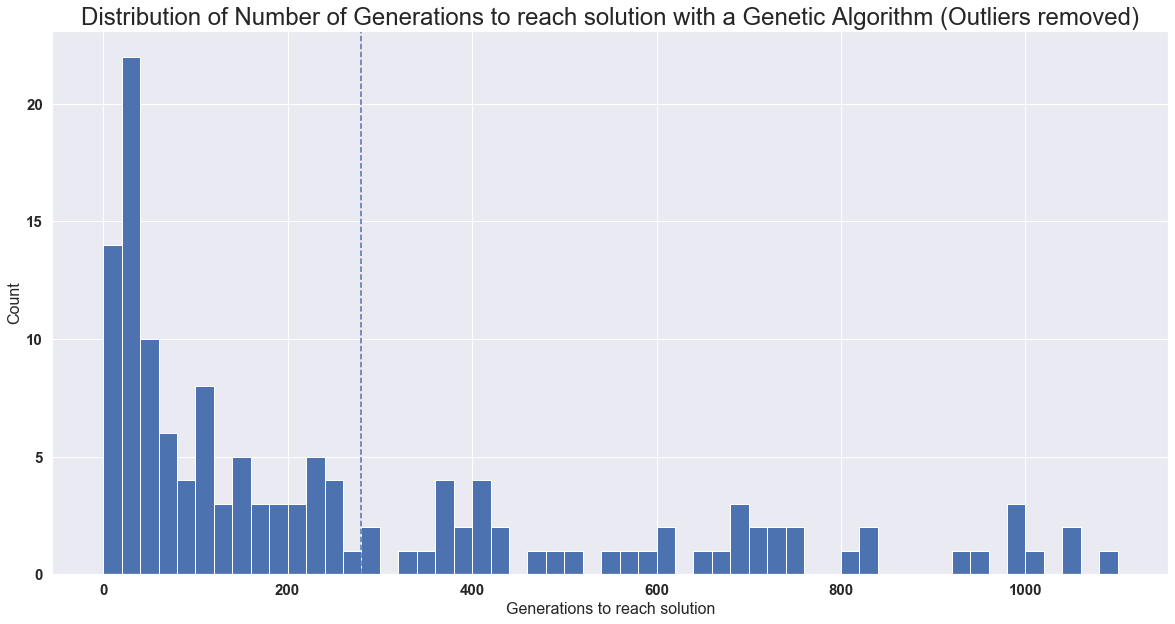

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

y = no_outliers

sns.set()
plt.hist(y, bins=np.arange(0, max(no_outliers), 20))
plt.xlabel('Generations to reach solution', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Number of Generations to reach solution with a Genetic Algorithm (Outliers removed)', fontsize=24)
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.axvline(x=np.mean(no_outliers), label='Mean', ls='--')
plt.show()